# **Organización de Datos 75.06 - Trabajo Práctico N°1**
Visualizaciones - Transacciones SUBE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1/csv/sube.csv")

Mounted at /content/drive


Text(144.15277777777789, 0.5, 'Linea de colectivo')

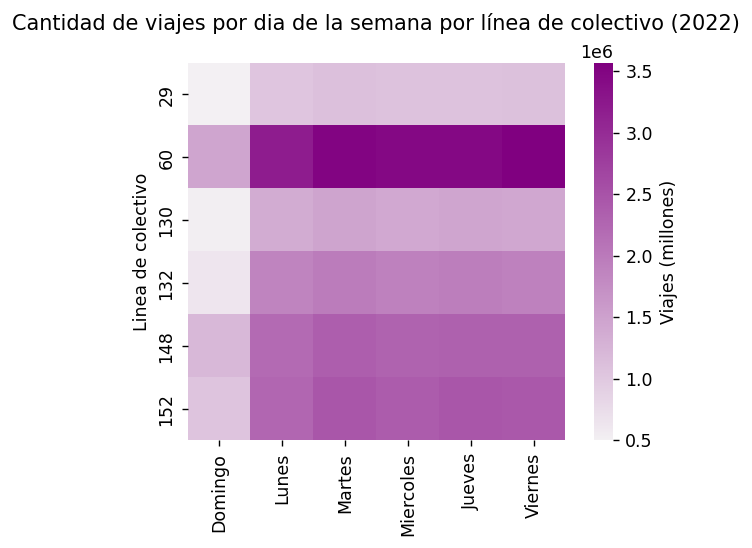

In [4]:
#Queremos la cantidad de viajes por dia de la semana para varias líneas de colectivos en 2022.
#Heatmap.

viajes = df[ ['DIA_TRANSPORTE', 'LINEA', 'CANTIDAD'] ]
lineas = ['BSAS_LINEA_130', 'BSAS_LINEA_152', 'BSAS_LINEA_060', 'BSAS_LINEA_148', 'BSAS_LINEA_029', 'BSAS_LINEA_132']
dias = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}

columnas = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']

viajes = viajes[ viajes['LINEA'].isin(lineas) ] #Filtramos por las lineas de interes.
viajes['DIA_TRANSPORTE'] = pd.to_datetime(viajes['DIA_TRANSPORTE']).dt.day_name().replace(dias) #Pasamos las fechas a dias de la semana y traducimos.

viajes_por_dia = viajes.groupby(['DIA_TRANSPORTE', 'LINEA'])['CANTIDAD'].sum().to_frame()

indices = {'BSAS_LINEA_029':'29', 'BSAS_LINEA_060':'60', 'BSAS_LINEA_130':'130', 'BSAS_LINEA_132':'132', 'BSAS_LINEA_148':'148', 'BSAS_LINEA_152':'152'}
matriz = viajes_por_dia.pivot_table(values='CANTIDAD', index='LINEA', columns='DIA_TRANSPORTE').reindex(columns=columnas).rename(index=indices)
matriz

plt.figure(dpi=125)
plt.title("Cantidad de viajes por dia de la semana por línea de colectivo (2022)\n")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("purple", as_cmap=True), cbar_kws={'label': 'Viajes (millones)'})
plt.xlabel("")
plt.ylabel("Linea de colectivo")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

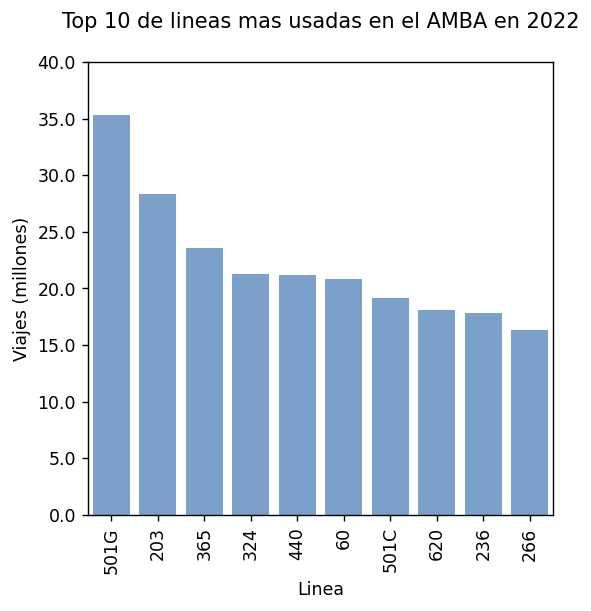

In [5]:
viajes = df[ ['LINEA', 'CANTIDAD'] ] 
viajes = viajes[ viajes['LINEA'].str.contains('|'.join(['BSAS_LINEA'])) ] #Filtramos por lineas del AMBA.

top10lineas = viajes.groupby('LINEA')['CANTIDAD'].sum().nlargest(10).to_frame().reset_index()
top10lineas['LINEA'] = top10lineas['LINEA'].str.replace("BSAS_LINEA_0","") #Limpiamos el nombre de la linea 60.
top10lineas['LINEA'] = top10lineas['LINEA'].str.replace("BSAS_LINEA_","") #Limpiamos el nombre de las otras lineas.

plt.figure(dpi=125,figsize=(4.8, 4.8))
graf = sns.barplot(data=top10lineas, x='LINEA', y='CANTIDAD', palette=['#6ea0d8'])
plt.title("Top 10 de lineas mas usadas en el AMBA en 2022\n")
plt.ylabel('Viajes (millones)')
plt.yticks(graf.get_yticks(), graf.get_yticks() / 1000000)
plt.xlabel('Linea')
plt.xticks(rotation=90)